In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

DATA_FOLDER = "../../../../Documents/MLBData/"
print(DATA_FOLDER)

def load_batting_data(fileName,data_path = DATA_FOLDER):
    csv_path = os.path.join(data_path,fileName)
    return pd.read_csv(csv_path)


advanced = load_batting_data('2018-BattingAdvanced(CSV).csv')
advanced = advanced[advanced['PA'] >= 50]
advanced.drop(columns=['Tm', 'cWPA'], inplace=True)

standard = load_batting_data('2018-BattingStandard(CSV).csv')
standard = standard[standard['PA'] >= 50]
standard.drop(columns=['Pos Summary', 'Tm', 'Lg', 'Name', 'Age', 'PA'], inplace=True)


../../../../Documents/MLBData/


In [2]:
percentValues = ['HR%', 'SO%','BB%','HardH%', 'LD%', 'GB%','FB%', 'Pull%', 'Cent%', 'Oppo%', 'RS%', 'SB%', 'XBT%']
for value in percentValues:
    advanced[value] = advanced[value].apply(lambda x: float(x.strip('%')) if isinstance(x, str) else x)

# advanced.hist(bins=100, figsize =(20, 15))
# plt.show()

In [3]:
total_stats = pd.merge(advanced, standard, on='Name-additional', how='outer')

In [4]:
# total_stats.info()
total_stats.tail()

,Name,Age,PA,rOBA,Rbat+,BAbip,ISO,HR%,SO%,BB%,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
546,Bradley Zimmer,25.0,114,0.273,58.0,0.367,0.104,1.8,38.6,6.1,...,0.281,0.330,0.611,65.0,35,1,1,0,0,0
547,Ryan Zimmerman,33.0,323,0.363,119.0,0.284,0.222,4.0,17.0,9.3,...,0.337,0.486,0.824,114.0,140,10,3,0,2,1
548,Ben Zobrist,37.0,520,0.361,120.0,0.331,0.134,1.7,11.5,10.6,...,0.378,0.440,0.817,117.0,200,8,2,1,7,1
549,Mike Zunino,27.0,405,0.290,82.0,0.268,0.209,4.9,37.0,5.9,...,0.259,0.410,0.669,85.0,153,7,6,0,2,0
550,LgAvg per 600 PA,NaN,600,0.323,96.0,0.295,0.161,3.0,22.3,8.5,...,0.318,0.409,0.727,NaN,219,11,6,3,4,3


In [5]:
league_avg = total_stats.iloc[-1]

train_set, test_set = train_test_split(total_stats, test_size=0.2, random_state=42)

# print(league_avg)
print(len(train_set))
print(len(test_set))

440
111


In [27]:
training_stats = train_set.copy()

# Create a new dataframe with only the columns to subtract
cols_to_subtract = [col for col in training_stats.columns if col not in ['Name-additional', 'Name', 'Age']]
cols_to_subtract_df = training_stats[cols_to_subtract]

# Subtract the last row of the new dataframe from the original dataframe
training_stats[cols_to_subtract] = training_stats[cols_to_subtract].sub(cols_to_subtract_df.iloc[-1])


<AxesSubplot: xlabel='H', ylabel='SO%'>

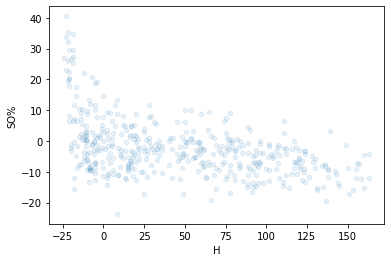

In [28]:
training_stats.plot(kind='scatter', x='H', y='SO%', alpha=0.1)

In [41]:
# training_stats.info()
# training_stats.head()
print(training_stats.columns)
cor_matrix = training_stats.corr()
cor_matrix['BB'].sort_values(ascending = False)

Index(['Name', 'Age', 'PA', 'rOBA', 'Rbat+', 'BAbip', 'ISO', 'HR%', 'SO%',
       'BB%', 'EV', 'HardH%', 'LD%', 'GB%', 'FB%', 'GB/FB', 'Pull%', 'Cent%',
       'Oppo%', 'WPA', 'RE24', 'RS%', 'SB%', 'XBT%', 'Name-additional', 'G',
       'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA',
       'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB'],
      dtype='object')


/var/folders/sb/877p4zx55jj9qq81bb1hj2jr0000gn/T/ipykernel_4489/557756771.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = training_stats.corr()


BB        1.000000
R         0.874253
PA        0.855018
TB        0.841485
RBI       0.828728
AB        0.819559
H         0.806343
G         0.803020
HR        0.788180
SO        0.780146
2B        0.779761
BB%       0.679003
RE24      0.654703
OBP       0.621748
IBB       0.609810
OPS       0.608775
rOBA      0.602866
OPS+      0.601429
SF        0.592702
Rbat+     0.577483
SLG       0.561989
GDP       0.553905
ISO       0.534074
HBP       0.473652
EV        0.452083
HR%       0.445942
HardH%    0.445649
BA        0.439400
SB        0.424872
CS        0.422231
3B        0.406105
FB%       0.319813
Pull%     0.289757
BAbip     0.251248
LD%       0.222351
XBT%      0.138856
WPA       0.126644
Age       0.040812
RS%       0.018408
SB%      -0.016676
Cent%    -0.109969
GB%      -0.138170
SH       -0.201396
GB/FB    -0.266186
Oppo%    -0.272467
SO%      -0.314214
Name: BB, dtype: float64

array([[<AxesSubplot: xlabel='BB', ylabel='BB'>,
        <AxesSubplot: xlabel='R', ylabel='BB'>,
        <AxesSubplot: xlabel='SO%', ylabel='BB'>],
       [<AxesSubplot: xlabel='BB', ylabel='R'>,
        <AxesSubplot: xlabel='R', ylabel='R'>,
        <AxesSubplot: xlabel='SO%', ylabel='R'>],
       [<AxesSubplot: xlabel='BB', ylabel='SO%'>,
        <AxesSubplot: xlabel='R', ylabel='SO%'>,
        <AxesSubplot: xlabel='SO%', ylabel='SO%'>]], dtype=object)

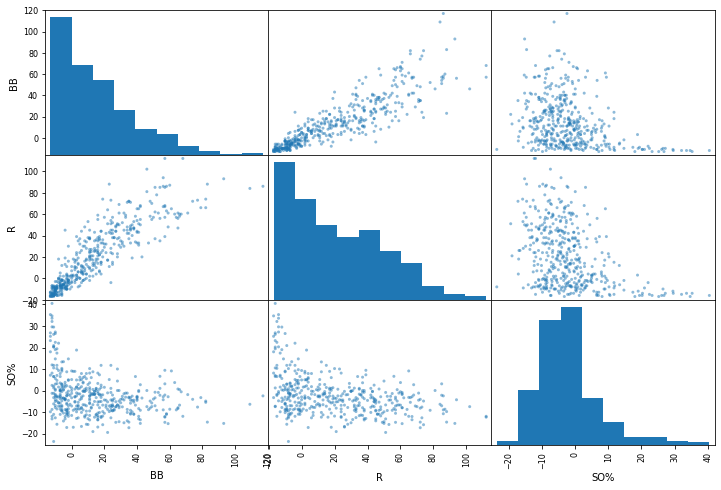

In [43]:
attributes= ['BB', 'R', 'SO%']
scatter_matrix(training_stats[attributes], figsize=(12, 8))

<AxesSubplot: xlabel='BA', ylabel='SO%'>

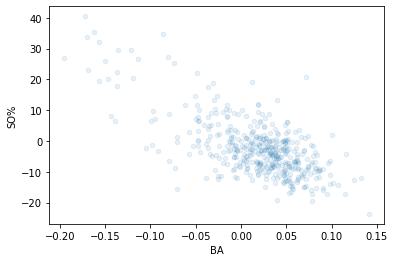

In [32]:
training_stats.plot(kind='scatter', x='BA', y='SO%', alpha=0.1)